## Decline Curve Plots

In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style

In [56]:
# Initial Parameters
t_1m = 1   # month 
q_1m = 240 # STB/D
t_0m = 0   # month
q_0m = 250 # STB/D

t = np.arange(0,60,2) # Time vector
print('t', t)

t [ 0  2  4  6  8 10 12 14 16 18 20 22 24 26 28 30 32 34 36 38 40 42 44 46
 48 50 52 54 56 58]


### Exponential Curve 

In [ ]:
# Exponential Curve Factors
b = np.log(q_0m/q_1m)/(t_1m - t_0m)
print('b = ',b)

# Rate after 12 months 
q_12m = q_0m * np.exp(-b *12)
print('q @ 12 months=',q_12m)

b =  0.0408219945202552
q @ 12 months= 153.1774393324417


In [ ]:
# Exponential Rate function
q = q_0m * np.exp( -b * t )
print('Rate(t) = ',q)

# Cumulative Production
Np = (q_0m - q) * 365/(b * 12)
print('Np(t) = ', Np)

Rate(t) =  [250.         230.4        212.33664    195.68944742 180.34739475
 166.208159   153.17743933 141.16832809 130.10073117 119.90083384
 110.50060847 101.83736077  93.85331168  86.49521205  79.71398742
  73.46441081  67.704801    62.3967446   57.50483983  52.99646038
  48.84153789  45.01236132  41.48339219  38.23109424  35.23377645
  32.47144838  29.92568683  27.57951298  25.41727916  23.42456448]
Np(t) =  [     0.          14604.05533029  28063.15272269  40467.05687952
  51898.49495046  62433.70827663  72142.96087804  81091.00807549
  89337.52837266  96937.52147854 103941.67512491 110396.70312541
 116345.65693067 121828.2127576  126880.93620769 131537.5261393
 135829.03942027 139784.09806001 143429.0801024  146788.29555266
 149884.14851163 152737.28659861 155366.73865957 157790.04167895
 160023.35774161 162081.58182496 163978.44114018 165726.58668508
 167337.67761926 168822.4590242 ]


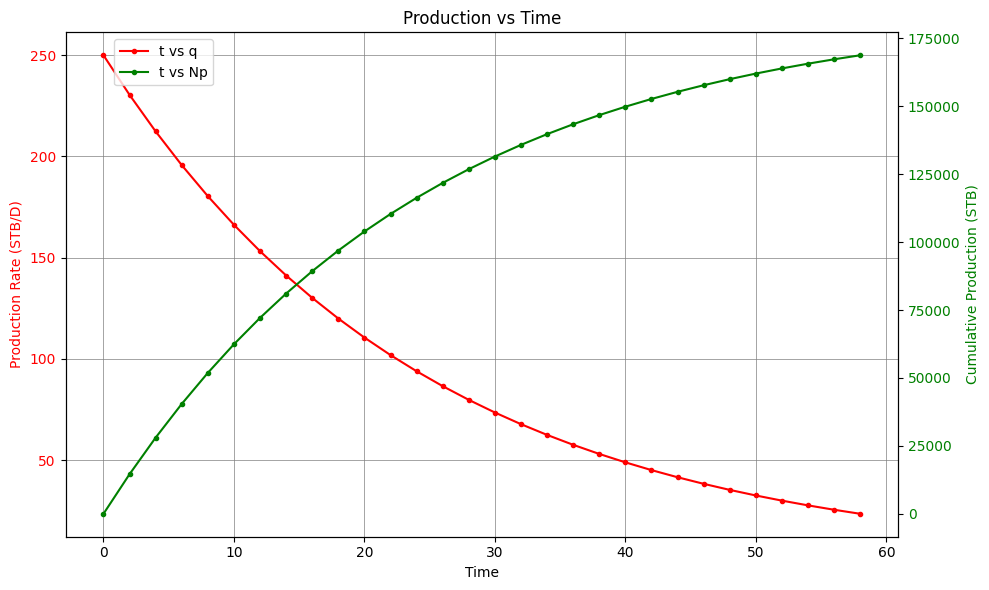

In [ ]:
# Plot Rate and Cum
import matplotlib.pyplot as plt
from matplotlib import style

# Optional: use 'default' style for white background
style.use('default')

# Create figure and primary axis
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot q on the left y-axis
line1, = ax1.plot(t, q, c='r', label='t vs q', linestyle='-', marker='.')
ax1.set_xlabel("Time")
ax1.set_ylabel("Production Rate (STB/D)", color='r')
ax1.tick_params(axis='y', labelcolor='r')

# Enable grid
ax1.grid(True, color='gray', linestyle='-', linewidth=0.5)

# Create a secondary y-axis for Np
ax2 = ax1.twinx()
line2, = ax2.plot(t, Np, c='g', label='t vs Np', linestyle='-', marker='.')
ax2.set_ylabel("Cumulative Production (STB)", color='g')
ax2.tick_params(axis='y', labelcolor='g')

# Combine legends from both axes
lines = [line1, line2]
labels = [line.get_label() for line in lines]
ax1.legend(lines, labels, loc='upper left', bbox_to_anchor=(0.05, 1.0))

# Title and legend
plt.title("Production vs Time (Exponencial Model)")
fig.tight_layout()  # Prevent overlap

# Show plot
plt.show()


## Semilog plot

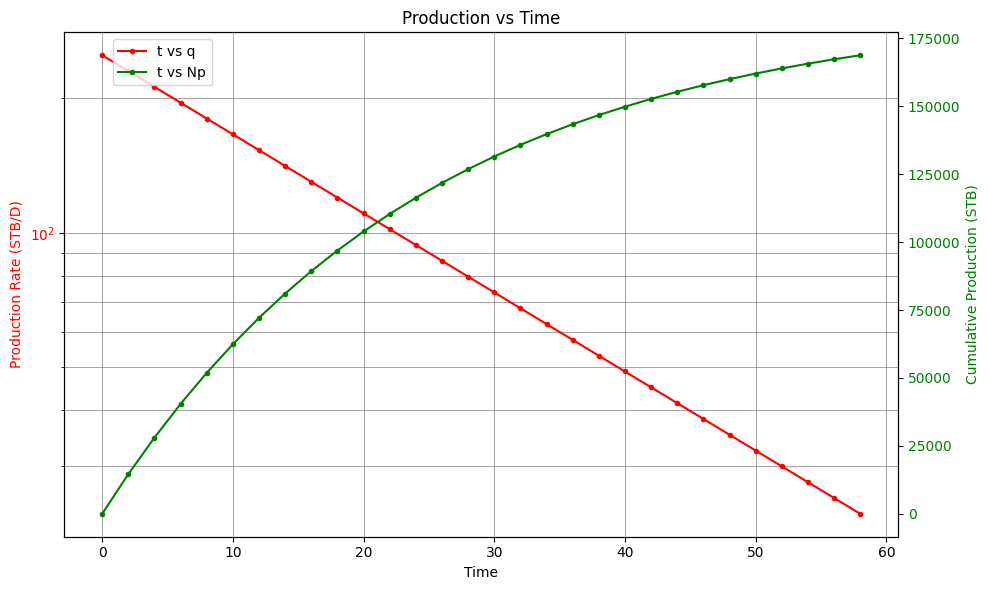

In [ ]:
# Plot Rate and Cum
import matplotlib.pyplot as plt
from matplotlib import style

# Use default (white background)
style.use('default')

# Create figure and primary axis
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot q on the left y-axis
line1, = ax1.plot(t, q, c='r', label='t vs q', linestyle='-', marker='.')
ax1.set_xlabel("Time")
ax1.set_ylabel("Production Rate (STB/D)", color='r')
ax1.tick_params(axis='y', labelcolor='r')
ax1.set_yscale('log')  # Set log scale on left y-axis

# Enable grid
ax1.grid(True, color='gray', linestyle='-', linewidth=0.5, which='both')

# Create a secondary y-axis for Np
ax2 = ax1.twinx()
line2, = ax2.plot(t, Np, c='g', label='t vs Np', linestyle='-', marker='.')
ax2.set_ylabel("Cumulative Production (STB)", color='g')
ax2.tick_params(axis='y', labelcolor='g')

# Combine legends from both axes
lines = [line1, line2]
labels = [line.get_label() for line in lines]
ax1.legend(lines, labels, loc='upper left', bbox_to_anchor=(0.05, 1.0))

# Title and layout
plt.title("Production vs Time (Exponential - Semilog)")
fig.tight_layout()

# Show plot
plt.show()


## Harmonic Decline Curve

In [70]:
# Initial Parameters
t_1m = 1   # month 
q_1m = 240 # STB/D
t_0m = 0   # month
q_0m = 250 # STB/D

t = np.arange(0,60,2) # Time vector
print('t', t)

# Exponential Curve Factors
b = (q_0m/q_1m-1)/(t_1m - t_0m)
print('b = ',b)

t [ 0  2  4  6  8 10 12 14 16 18 20 22 24 26 28 30 32 34 36 38 40 42 44 46
 48 50 52 54 56 58]
b =  0.04166666666666674


In [71]:
# Harmonic Rate function
q = q_0m / ( 1 + b *t)
print('Rate(t) = ',q)

# Cumulative Production
Np = (np.log(q_0m) - np.log(q)) *((q_0m *365) /(12*b)) 
print('Np(t) = ', Np)

Rate(t) =  [250.         230.76923077 214.28571429 200.         187.5
 176.47058824 166.66666667 157.89473684 150.         142.85714286
 136.36363636 130.43478261 125.         120.         115.38461538
 111.11111111 107.14285714 103.44827586 100.          96.77419355
  93.75        90.90909091  88.23529412  85.71428571  83.33333333
  81.08108108  78.94736842  76.92307692  75.          73.17073171]
Np(t) =  [     0.          14607.79415042  28132.49906847  40723.69811484
  52501.97822245  63565.97170395  73997.38222974  83864.65011157
  93225.67633729 102129.88129821 110619.78415158 118732.23082076
 126499.36045219 133949.37445214 141107.15460261 147994.76445948
 154631.85952066 161036.02538622 167223.05856703 173207.20123223
 179001.33867464 184617.16638132 190065.33215614 195355.55763551
 200496.74268193 205497.05547126 210364.01056376 215104.53683235
 219725.03678948 224231.43858723]


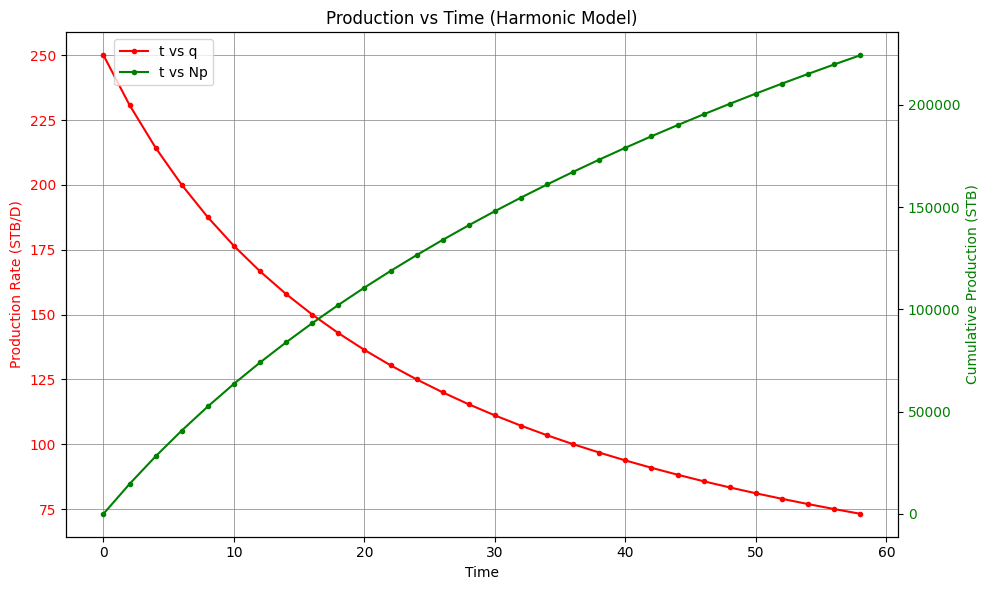

In [72]:
# Plot Rate and Cum
import matplotlib.pyplot as plt
from matplotlib import style

# Optional: use 'default' style for white background
style.use('default')

# Create figure and primary axis
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot q on the left y-axis
line1, = ax1.plot(t, q, c='r', label='t vs q', linestyle='-', marker='.')
ax1.set_xlabel("Time")
ax1.set_ylabel("Production Rate (STB/D)", color='r')
ax1.tick_params(axis='y', labelcolor='r')

# Enable grid
ax1.grid(True, color='gray', linestyle='-', linewidth=0.5)

# Create a secondary y-axis for Np
ax2 = ax1.twinx()
line2, = ax2.plot(t, Np, c='g', label='t vs Np', linestyle='-', marker='.')
ax2.set_ylabel("Cumulative Production (STB)", color='g')
ax2.tick_params(axis='y', labelcolor='g')

# Combine legends from both axes
lines = [line1, line2]
labels = [line.get_label() for line in lines]
ax1.legend(lines, labels, loc='upper left', bbox_to_anchor=(0.05, 1.0))

# Title and legend
plt.title("Production vs Time (Harmonic Model)")
fig.tight_layout()  # Prevent overlap

# Show plot
plt.show()

## semilog plot total production v/s rate 

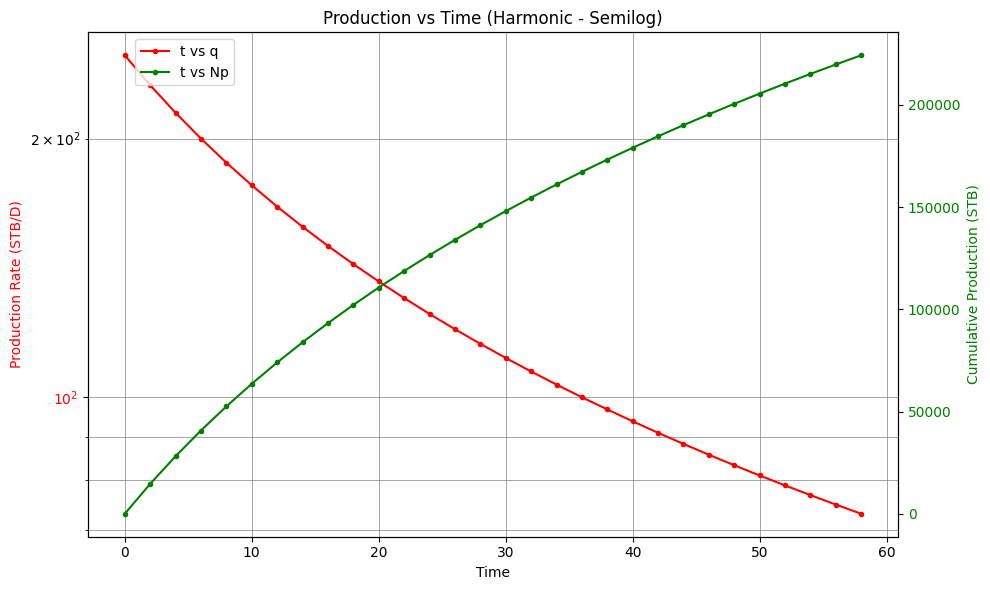

In [73]:
# Plot Rate and Cum
import matplotlib.pyplot as plt
from matplotlib import style

# Use default (white background)
style.use('default')

# Create figure and primary axis
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot q on the left y-axis
line1, = ax1.plot(t, q, c='r', label='t vs q', linestyle='-', marker='.')
ax1.set_xlabel("Time")
ax1.set_ylabel("Production Rate (STB/D)", color='r')
ax1.tick_params(axis='y', labelcolor='r')
ax1.set_yscale('log')  # Set log scale on left y-axis

# Enable grid
ax1.grid(True, color='gray', linestyle='-', linewidth=0.5, which='both')

# Create a secondary y-axis for Np
ax2 = ax1.twinx()
line2, = ax2.plot(t, Np, c='g', label='t vs Np', linestyle='-', marker='.')
ax2.set_ylabel("Cumulative Production (STB)", color='g')
ax2.tick_params(axis='y', labelcolor='g')

# Combine legends from both axes
lines = [line1, line2]
labels = [line.get_label() for line in lines]
ax1.legend(lines, labels, loc='upper left', bbox_to_anchor=(0.05, 1.0))

# Title and layout
plt.title("Production vs Time (Harmonic - Semilog)")
fig.tight_layout()

# Show plot
plt.show()